In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u # Don't name any variable as u.
%matplotlib inline

In [2]:
def get_flux(delta, transit_total, transit_full_sup, period, delta_sec, split):
    d = delta
    o = delta_sec
    flux = []
    
    time = np.linspace(-period/2, period/2, split)
    p = period/4
    t = transit_total/2
    f = transit_full_sup/2
    for x in time:
        if x > (-p-f) and x < (-p+f):
            flux.append(1.0 - o)
        elif x > (p-f) and x < (p+f):
            flux.append(1.0 - d)
        elif x > (-p-t) and x < (-p-f):
            flux.append(1.0 - (o * (x-(-p-t)) / (t-f)))
        elif x > (-p+f) and x < (-p+t):
            flux.append(1.0 - (o * ((-p+t)-x) / (t-f)))
        elif x > (p-t) and x < (p-f):
            flux.append(1.0 - (d * (x-(p-t)) / (t-f)))
        elif x > (p+f) and x < (p+t):
            flux.append(1.0 - (d * ((p+t)-x) / (t-f)))
        else:
            flux.append(1.0)
    
    return flux

In [3]:
class system(object):
    def __init__(self, *args, **kw):
        self.tT = kw['transit_total']
        self.tF = kw['transit_full_sup']
        self.d = kw['delta']
        self.P = kw['period']
        self.ds = kw['delta_sec']
        self.split = 2000

    def plot(self):
        flux = get_flux(self.d, self.tT, self.tF, self.P, self.ds, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
        ax.scatter(t, flux, s=1, c=['b' if fl == 1.0 else 'g' for fl in flux])

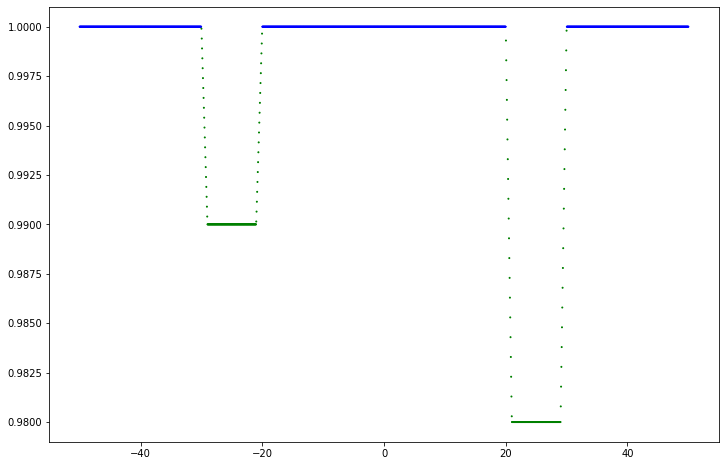

In [4]:
sys = system(transit_total = 10, transit_full_sup = 8, delta = 0.02, period = 100, delta_sec = 0.01)
sys.plot()

In [5]:
class system(object):
    def __init__(self, *args, **kw):
        self.tT = kw['transit_total']
        self.tF = kw['transit_full_sup']
        self.P = kw['period']
#         self.d = kw['delta']
#         self.ds = kw['delta_sec']
        self.Rp = kw['planet_radius']
        self.Rs = kw['star_radius']
        self.alb = kw['albedo']
        self.split = 2000
        self.delta()
        self.delta_sec()
        
    def delta(self):
        self.d = (self.Rp / self.Rs) ** 2
    
    def delta_sec(self):
        self.ds = self.d * self.alb

    def plot(self):
        flux = get_flux(self.d, self.tT, self.tF, self.P, self.ds, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
        ax.scatter(t, flux, s=1, c=['b' if fl == 1.0 else 'g' for fl in flux])
    
    def params(self):
        print('tT', self.tT)
        print('tF', self.tF)
        print('Period', self.P)
        print('delta', self.d)
        print('delta_sec', self.ds)
        print('Rp', self.Rp)
        print('Rs', self.Rs)
        print('albedo', self.alb)


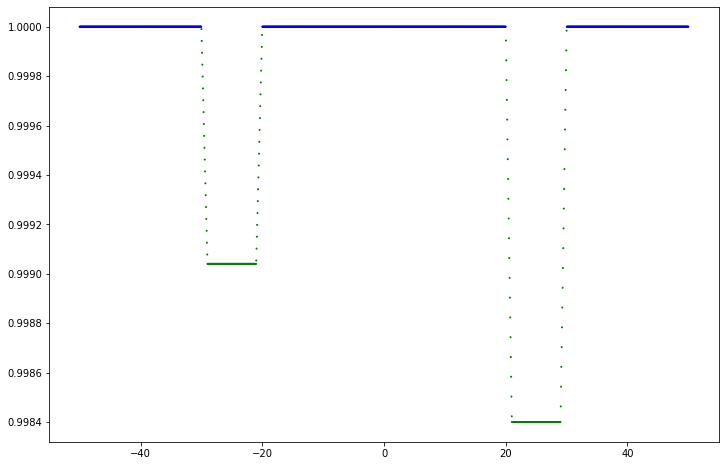

In [6]:
sys = system(transit_total = 10, transit_full_sup = 8, period = 100, \
             planet_radius = 2, star_radius = 50, albedo = 0.6)
sys.plot()

In [7]:
sys.params()

tT 10
tF 8
Period 100
delta 0.0016
delta_sec 0.00096
Rp 2
Rs 50
albedo 0.6


In [8]:
class system(object):
    def __init__(self, *args, **kw):
#         self.tT = kw['transit_total']
#         self.tF = kw['transit_full_sup']
        self.P = kw['period']
#         self.d = kw['delta']
#         self.ds = kw['delta_sec']
        self.Rp = kw['planet_radius']
        self.Rs = kw['star_radius']
        self.a = kw['orbit_radius']
        self.i = kw['orbit_inclination']
        self.alb = kw['albedo']
        self.split = 20000
        self.delta()
        self.delta_sec()
        self.transit_durations()
        
    def delta(self):
        self.d = (self.Rp / self.Rs) ** 2
    
    def delta_sec(self):
        self.ds = self.d * self.alb
        
    def transit_durations(self):
        prop = (self.P * self.Rs) / (np.pi * self.a)
        ratio = self.Rp / self.Rs
        b = self.a * np.cos(self.i) / self.Rs
        self.tT = prop * ((((1 + ratio) ** 2) - (b ** 2)) ** 0.5)
        self.tF = prop * ((((1 - ratio) ** 2) - (b ** 2)) ** 0.5)

    def plot(self):
        flux = get_flux(self.d, self.tT, self.tF, self.P, self.ds, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
        ax.scatter(t, flux, s=1, c=['b' if fl == 1.0 else 'g' for fl in flux])
    
    def params(self):
        print('tT', self.tT)
        print('tF', self.tF)
        print('Period', self.P)
        print('delta', self.d)
        print('delta_sec', self.ds)
        print('Rp', self.Rp)
        print('Rs', self.Rs)
        print('orbit_radius', self.a)
        print('orbit_inclination', self.i)
        print('albedo', self.alb)


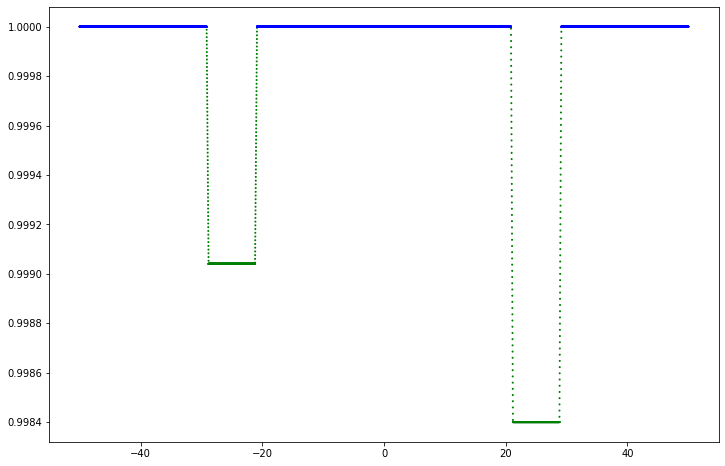

In [9]:
sys = system(period = 100, planet_radius = 2, star_radius = 50, \
             orbit_radius = 200, orbit_inclination = np.pi/2, albedo = 0.6)
sys.plot()

In [10]:
sys.params()

tT 8.276057040778557
tF 7.639437268410976
Period 100
delta 0.0016
delta_sec 0.00096
Rp 2
Rs 50
orbit_radius 200
orbit_inclination 1.5707963267948966
albedo 0.6


In [11]:
class system(object):
    def __init__(self, *args, **kw):
#         self.tT = kw['transit_total']
#         self.tF = kw['transit_full_sup']
        self.P = kw['period']
#         self.d = kw['delta']
#         self.ds = kw['delta_sec']
        self.Rp = kw['planet_radius']
        self.Rs = kw['star_radius']
        self.a = kw['orbit_radius']
        self.i = kw['orbit_inclination']
        self.alb = kw['albedo']
#         self.b = kw['impact_parameter']
        self.split = 200000
        self.delta()
        self.delta_sec()
        self.impact_parameter()
        self.transit_durations()
        
    def delta(self):
        self.d = (self.Rp / self.Rs) ** 2
    
    def delta_sec(self):
        self.ds = self.d * self.alb
        
    def impact_parameter(self):
        if self.i == np.pi/2 :
            self.b = 0
        else:
            self.b = self.a * np.cos(self.i) / self.Rs
        
    def transit_durations(self):
        prop = (self.P * self.Rs) / (np.pi * self.a)
        ratio = self.Rp / self.Rs        
        self.tT = prop * ((((1 + self.Rp / self.Rs) ** 2) - (self.b ** 2)) ** 0.5)
        self.tF = prop * ((((1 - self.Rp / self.Rs) ** 2) - (self.b ** 2)) ** 0.5)
        
    def plot(self):
        flux = get_flux(self.d, self.tT, self.tF, self.P, self.ds, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
        ax.scatter(t, flux, s=1, c=['b' if fl == 1.0 else 'g' for fl in flux])

    def plot_zoom(self):
        flux = get_flux(self.d, self.tT, self.tF, self.P, self.ds, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        fig = plt.figure(figsize=(12,4))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        ax1.scatter(t, flux, s=1, c=['b' if fl == 1.0 else 'g' for fl in flux])
        ax2.scatter(t, flux, s=1, c=['b' if fl == 1.0 else 'g' for fl in flux])
        ax1.set_xlim(-self.P/4 - self.tT, -self.P/4 + self.tT)
        ax2.set_xlim(self.P/4 - self.tT, self.P/4 + self.tT)
        
    def params(self):
        print('tT', self.tT)
        print('tF', self.tF)
        print('Period', self.P)
        print('delta', self.d)
        print('delta_sec', self.ds)
        print('Rp', self.Rp)
        print('Rs', self.Rs)
        print('albedo', self.alb)
        print('orbit_radius', self.a)
        print('orbit_inclination', self.i)
        print('impact_parameter', self.b)
        

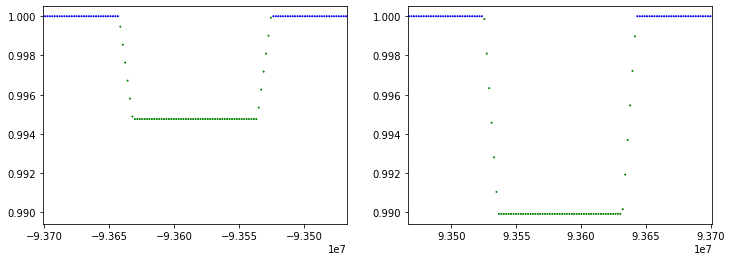

In [12]:
sys = system(period = 4332.59*24*3600, planet_radius = 69911000, star_radius = 696340000, \
             orbit_radius = 778500000000, orbit_inclination = np.pi/2, albedo = 0.52)
# Jupiter - Sun system
sys.plot_zoom()

In [13]:
sys.params()

tT 117279.98457444001
tF 95879.26600680703
Period 374335776.0
delta 0.010079717076411147
delta_sec 0.005241452879733797
Rp 69911000
Rs 696340000
albedo 0.52
orbit_radius 778500000000
orbit_inclination 1.5707963267948966
impact_parameter 0


In [14]:
def get_flux_optimized(delta, transit_total, transit_full_sup, period, delta_sec, split):
    d = delta
    o = delta_sec
    flux = []
    c = []
    
    time = np.linspace(-period/2, period/2, split)
    p = period/4
    t = transit_total/2
    f = transit_full_sup/2
    for i in range(len(time)):
        if time[i] > (-p-f) and time[i] < (-p+f):
            flux.append(1.0 - o)
            c.append('r')
        elif time[i] > (p-f) and time[i] < (p+f):
            flux.append(1.0 - d)
            c.append('g')
        elif time[i] > (-p-t) and time[i] < (-p-f):
            flux.append(1.0 - (o * (time[i]-(-p-t)) / (t-f)))
            c.append('r')
        elif time[i] > (-p+f) and time[i] < (-p+t):
            flux.append(1.0 - (o * ((-p+t)-time[i]) / (t-f)))
            c.append('r')
        elif time[i] > (p-t) and time[i] < (p-f):
            flux.append(1.0 - (d * (time[i]-(p-t)) / (t-f)))
            c.append('g')
        elif time[i] > (p+f) and time[i] < (p+t):
            flux.append(1.0 - (d * ((p+t)-time[i]) / (t-f)))
            c.append('g')
        else:
            flux.append(1.0)
            c.append('b')
    
    return flux, c

In [15]:
class system(object):
    def __init__(self, *args, **kw):
#         self.tT = kw['transit_total']
#         self.tF = kw['transit_full_sup']
        self.P = kw['period']
#         self.d = kw['delta']
#         self.ds = kw['delta_sec']
        self.Rp = kw['planet_radius']
        self.Rs = kw['star_radius']
        self.a = kw['orbit_radius']
        self.i = kw['orbit_inclination']
        self.alb = kw['albedo']
#         self.b = kw['impact_parameter']
        self.split = 200000
        self.delta()
        self.delta_sec()
        self.impact_parameter()
        self.transit_durations()
        
    def delta(self):
        self.d = (self.Rp / self.Rs) ** 2
    
    def delta_sec(self):
        self.ds = self.d * self.alb
        
    def impact_parameter(self):
        if self.i == np.pi/2 :
            self.b = 0
        else:
            self.b = self.a * np.cos(self.i) / self.Rs
        
    def transit_durations(self):
        prop = (self.P * self.Rs) / (np.pi * self.a)
        ratio = self.Rp / self.Rs        
        self.tT = prop * ((((1 + self.Rp / self.Rs) ** 2) - (self.b ** 2)) ** 0.5)
        self.tF = prop * ((((1 - self.Rp / self.Rs) ** 2) - (self.b ** 2)) ** 0.5)
        
    def plot(self):
        flux, color = get_flux_optimized(self.d, self.tT, self.tF, self.P, self.ds, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
        ax.scatter(t, flux, s=1, c=color)
        
    def plot_zoom(self):
        flux, color = get_flux_optimized(self.d, self.tT, self.tF, self.P, self.ds, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        ind_o_l = int((self.P/4 - self.tT) / self.P * self.split)
        ind_o_r = int((self.P/4 + self.tT) / self.P * self.split)
        fig, ax = plt.subplots(1, 2, sharey='row', figsize=(12,4))
        ax[0].scatter(t[ind_o_l:ind_o_r], flux[ind_o_l:ind_o_r], s=1, c=color[ind_o_l:ind_o_r])
        ax[1].scatter(t[-ind_o_r:-ind_o_l], flux[-ind_o_r:-ind_o_l], s=1, c=color[-ind_o_r:-ind_o_l])
        
    def params(self):
        print('tT', self.tT)
        print('tF', self.tF)
        print('Period', self.P)
        print('delta', self.d)
        print('delta_sec', self.ds)
        print('Rp', self.Rp)
        print('Rs', self.Rs)
        print('albedo', self.alb)
        print('orbit_radius', self.a)
        print('orbit_inclination', self.i)
        print('impact_parameter', self.b)
        

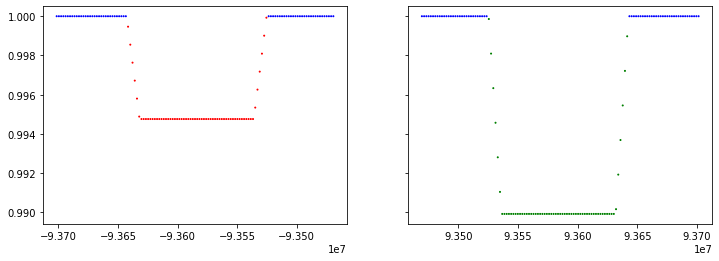

In [16]:
sys = system(period = 4332.59*24*3600, planet_radius = 69911000, star_radius = 696340000, \
             orbit_radius = 778500000000, orbit_inclination = np.pi/2, albedo = 0.52)
# Jupiter - Sun system
sys.plot_zoom()

In [17]:
sys.params()

tT 117279.98457444001
tF 95879.26600680703
Period 374335776.0
delta 0.010079717076411147
delta_sec 0.005241452879733797
Rp 69911000
Rs 696340000
albedo 0.52
orbit_radius 778500000000
orbit_inclination 1.5707963267948966
impact_parameter 0


In [18]:
def get_flux_corrected(delta, transit_total, transit_full_sup, period, planet_lum, split):
    d = delta
    pl = planet_lum
    flux = []
    c = []
    
    time = np.linspace(-period/2, period/2, split)
    p = period/4
    t = transit_total/2
    f = transit_full_sup/2
    for i in range(len(time)):
        if time[i] > (-p-f) and time[i] < (-p+f):
            flux.append(1.0)
            c.append('r')
        elif time[i] > (p-f) and time[i] < (p+f):
            flux.append(1.0 + (pl/2)*(1.0 - np.sin(2*np.pi*time[i]/period)) - d)
            c.append('g')
        elif time[i] > (-p-t) and time[i] < (-p-f):
            flux.append(1.0 + (pl/2)*(1.0 - np.sin(2*np.pi*time[i]/period)) - (pl * (time[i]-(-p-t)) / (t-f)))
            c.append('r')
        elif time[i] > (-p+f) and time[i] < (-p+t):
            flux.append(1.0 + (pl/2)*(1.0 - np.sin(2*np.pi*time[i]/period)) - (pl * ((-p+t)-time[i]) / (t-f)))
            c.append('r')
        elif time[i] > (p-t) and time[i] < (p-f):
            flux.append(1.0 + (pl/2)*(1.0 - np.sin(2*np.pi*time[i]/period)) - (d * (time[i]-(p-t)) / (t-f)))
            c.append('g')
        elif time[i] > (p+f) and time[i] < (p+t):
            flux.append(1.0 + (pl/2)*(1.0 - np.sin(2*np.pi*time[i]/period)) - (d * ((p+t)-time[i]) / (t-f)))
            c.append('g')
        else:
            flux.append(1.0 + (pl/2)*(1.0 - np.sin(2*np.pi*time[i]/period)))
            c.append('b')
    
    return flux, c

In [19]:
class system(object):
    def __init__(self, *args, **kw):
#         self.tT = kw['transit_total']
#         self.tF = kw['transit_full_sup']
        self.P = kw['period']
#         self.d = kw['delta']
#         self.pl = kw['planet_lum']
        self.Rp = kw['planet_radius']
        self.Rs = kw['star_radius']
        self.a = kw['orbit_radius']
        self.i = kw['orbit_inclination']
        self.alb = kw['albedo']
#         self.b = kw['impact_parameter']
        self.split = 200000
        self.delta()
        self.planet_lum()
        self.impact_parameter()
        self.transit_durations()
        
    def delta(self):
        self.d = (self.Rp / self.Rs) ** 2
    
    def planet_lum(self):
        self.pl = self.alb * 1.0 * (self.Rp**2) / (self.a**2)
        
    def impact_parameter(self):
        if self.i == np.pi/2 :
            self.b = 0
        else:
            self.b = self.a * np.cos(self.i) / self.Rs
        
    def transit_durations(self):
        prop = (self.P * self.Rs) / (np.pi * self.a)
        ratio = self.Rp / self.Rs        
        self.tT = prop * ((((1 + self.Rp / self.Rs) ** 2) - (self.b ** 2)) ** 0.5)
        self.tF = prop * ((((1 - self.Rp / self.Rs) ** 2) - (self.b ** 2)) ** 0.5)
        
    def plot(self):    
        flux, color = get_flux_corrected(self.d, self.tT, self.tF, self.P, self.pl, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
        ax.scatter(t, flux, s=1, c=color)

    def plot_y_zoom(self):
        flux, color = get_flux_corrected(self.d, self.tT, self.tF, self.P, self.pl, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111, ylim=(0.99999999, 1.00000001))
        ax.scatter(t, flux, s=1, c=color)
        plt.grid(True)
        
    def plot_zoom(self):
        flux, color = get_flux_corrected(self.d, self.tT, self.tF, self.P, self.pl, self.split)
        t = np.linspace(-self.P/2, self.P/2, self.split)
        ind_o_l = int((self.P/4 - self.tT) / self.P * self.split)
        ind_o_r = int((self.P/4 + self.tT) / self.P * self.split)
        fig, ax = plt.subplots(1, 2, figsize=(12,4))
        ax[0].scatter(t[ind_o_l:ind_o_r], flux[ind_o_l:ind_o_r], s=1, c=color[ind_o_l:ind_o_r])
        ax[1].scatter(t[-ind_o_r:-ind_o_l], flux[-ind_o_r:-ind_o_l], s=1, c=color[-ind_o_r:-ind_o_l])
        
    def params(self):
        print('tT', self.tT)
        print('tF', self.tF)
        print('Period', self.P)
        print('delta', self.d)
        print('planet_lum', self.pl)
        print('Rp', self.Rp)
        print('Rs', self.Rs)
        print('albedo', self.alb)
        print('orbit_radius', self.a)
        print('orbit_inclination', self.i)
        print('impact_parameter', self.b)
        

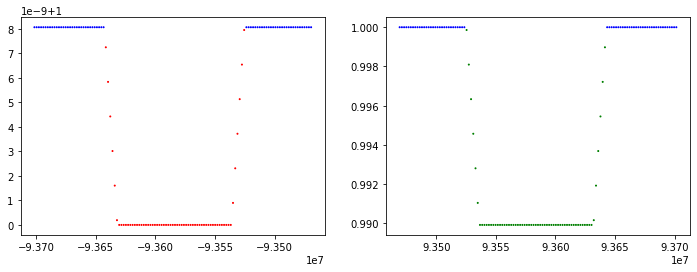

In [20]:
sys = system(period = 4332.59*24*3600, planet_radius = 69911000, star_radius = 696340000, \
             orbit_radius = 778500000000, orbit_inclination = np.pi/2, albedo = 1)
# Jupiter - Sun system
sys.plot_zoom()

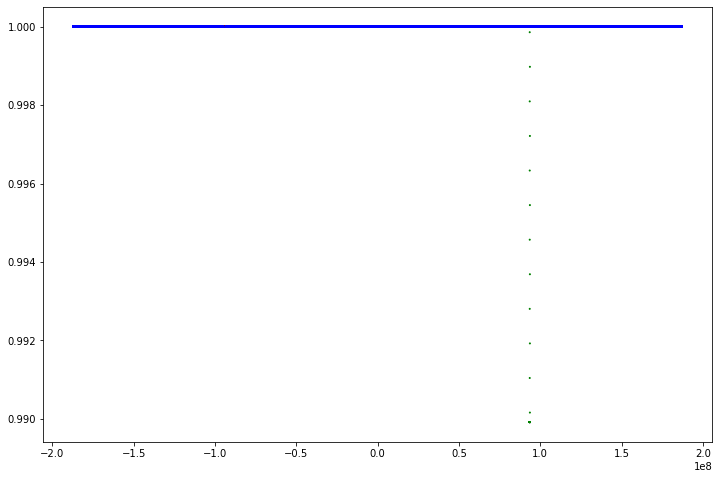

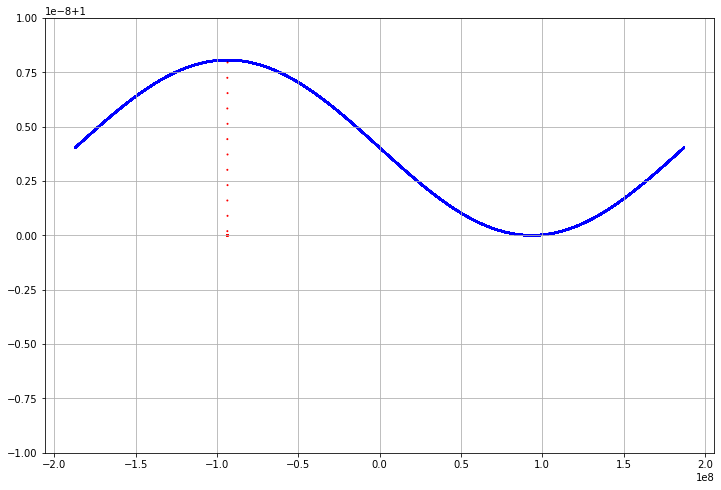

In [21]:
sys.plot()
sys.plot_y_zoom()

In [22]:
sys.params()

tT 117279.98457444001
tF 95879.26600680703
Period 374335776.0
delta 0.010079717076411147
planet_lum 8.064432194877672e-09
Rp 69911000
Rs 696340000
albedo 1
orbit_radius 778500000000
orbit_inclination 1.5707963267948966
impact_parameter 0
